In [1]:
from utils import *

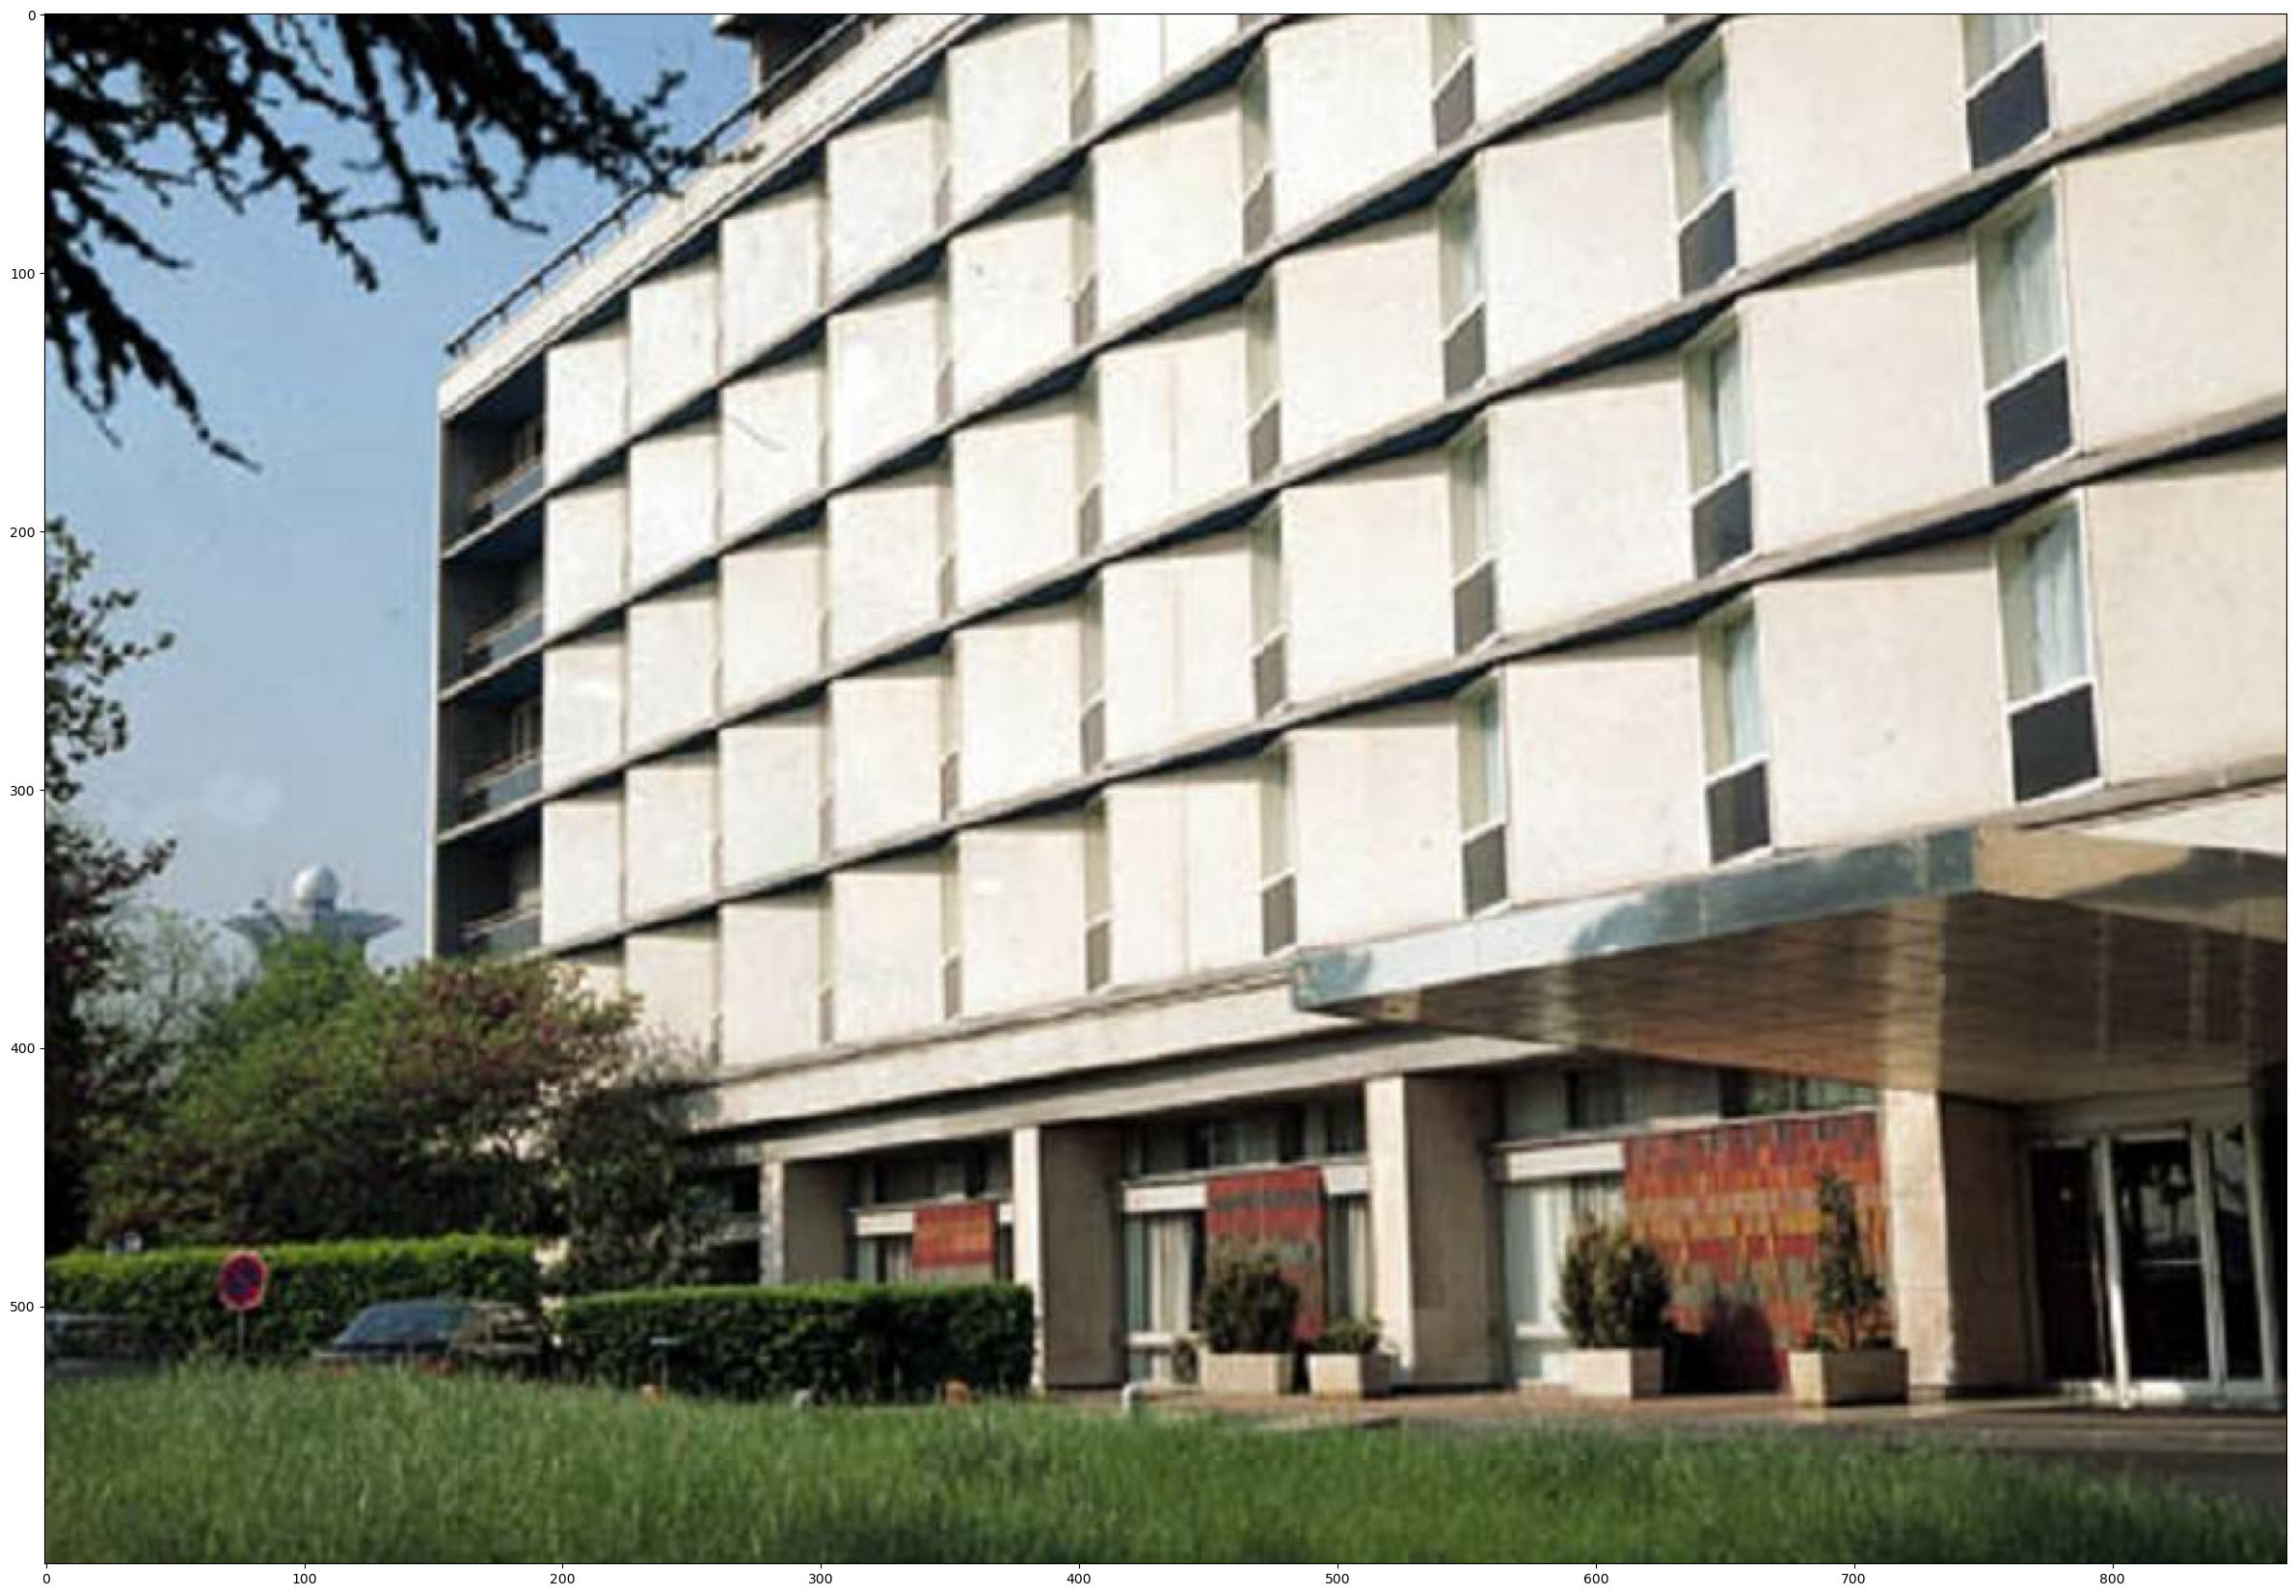

In [2]:
img = readImage('./input/opencv_data/building.jpg')
showImage(img, figsize=(30, 30))

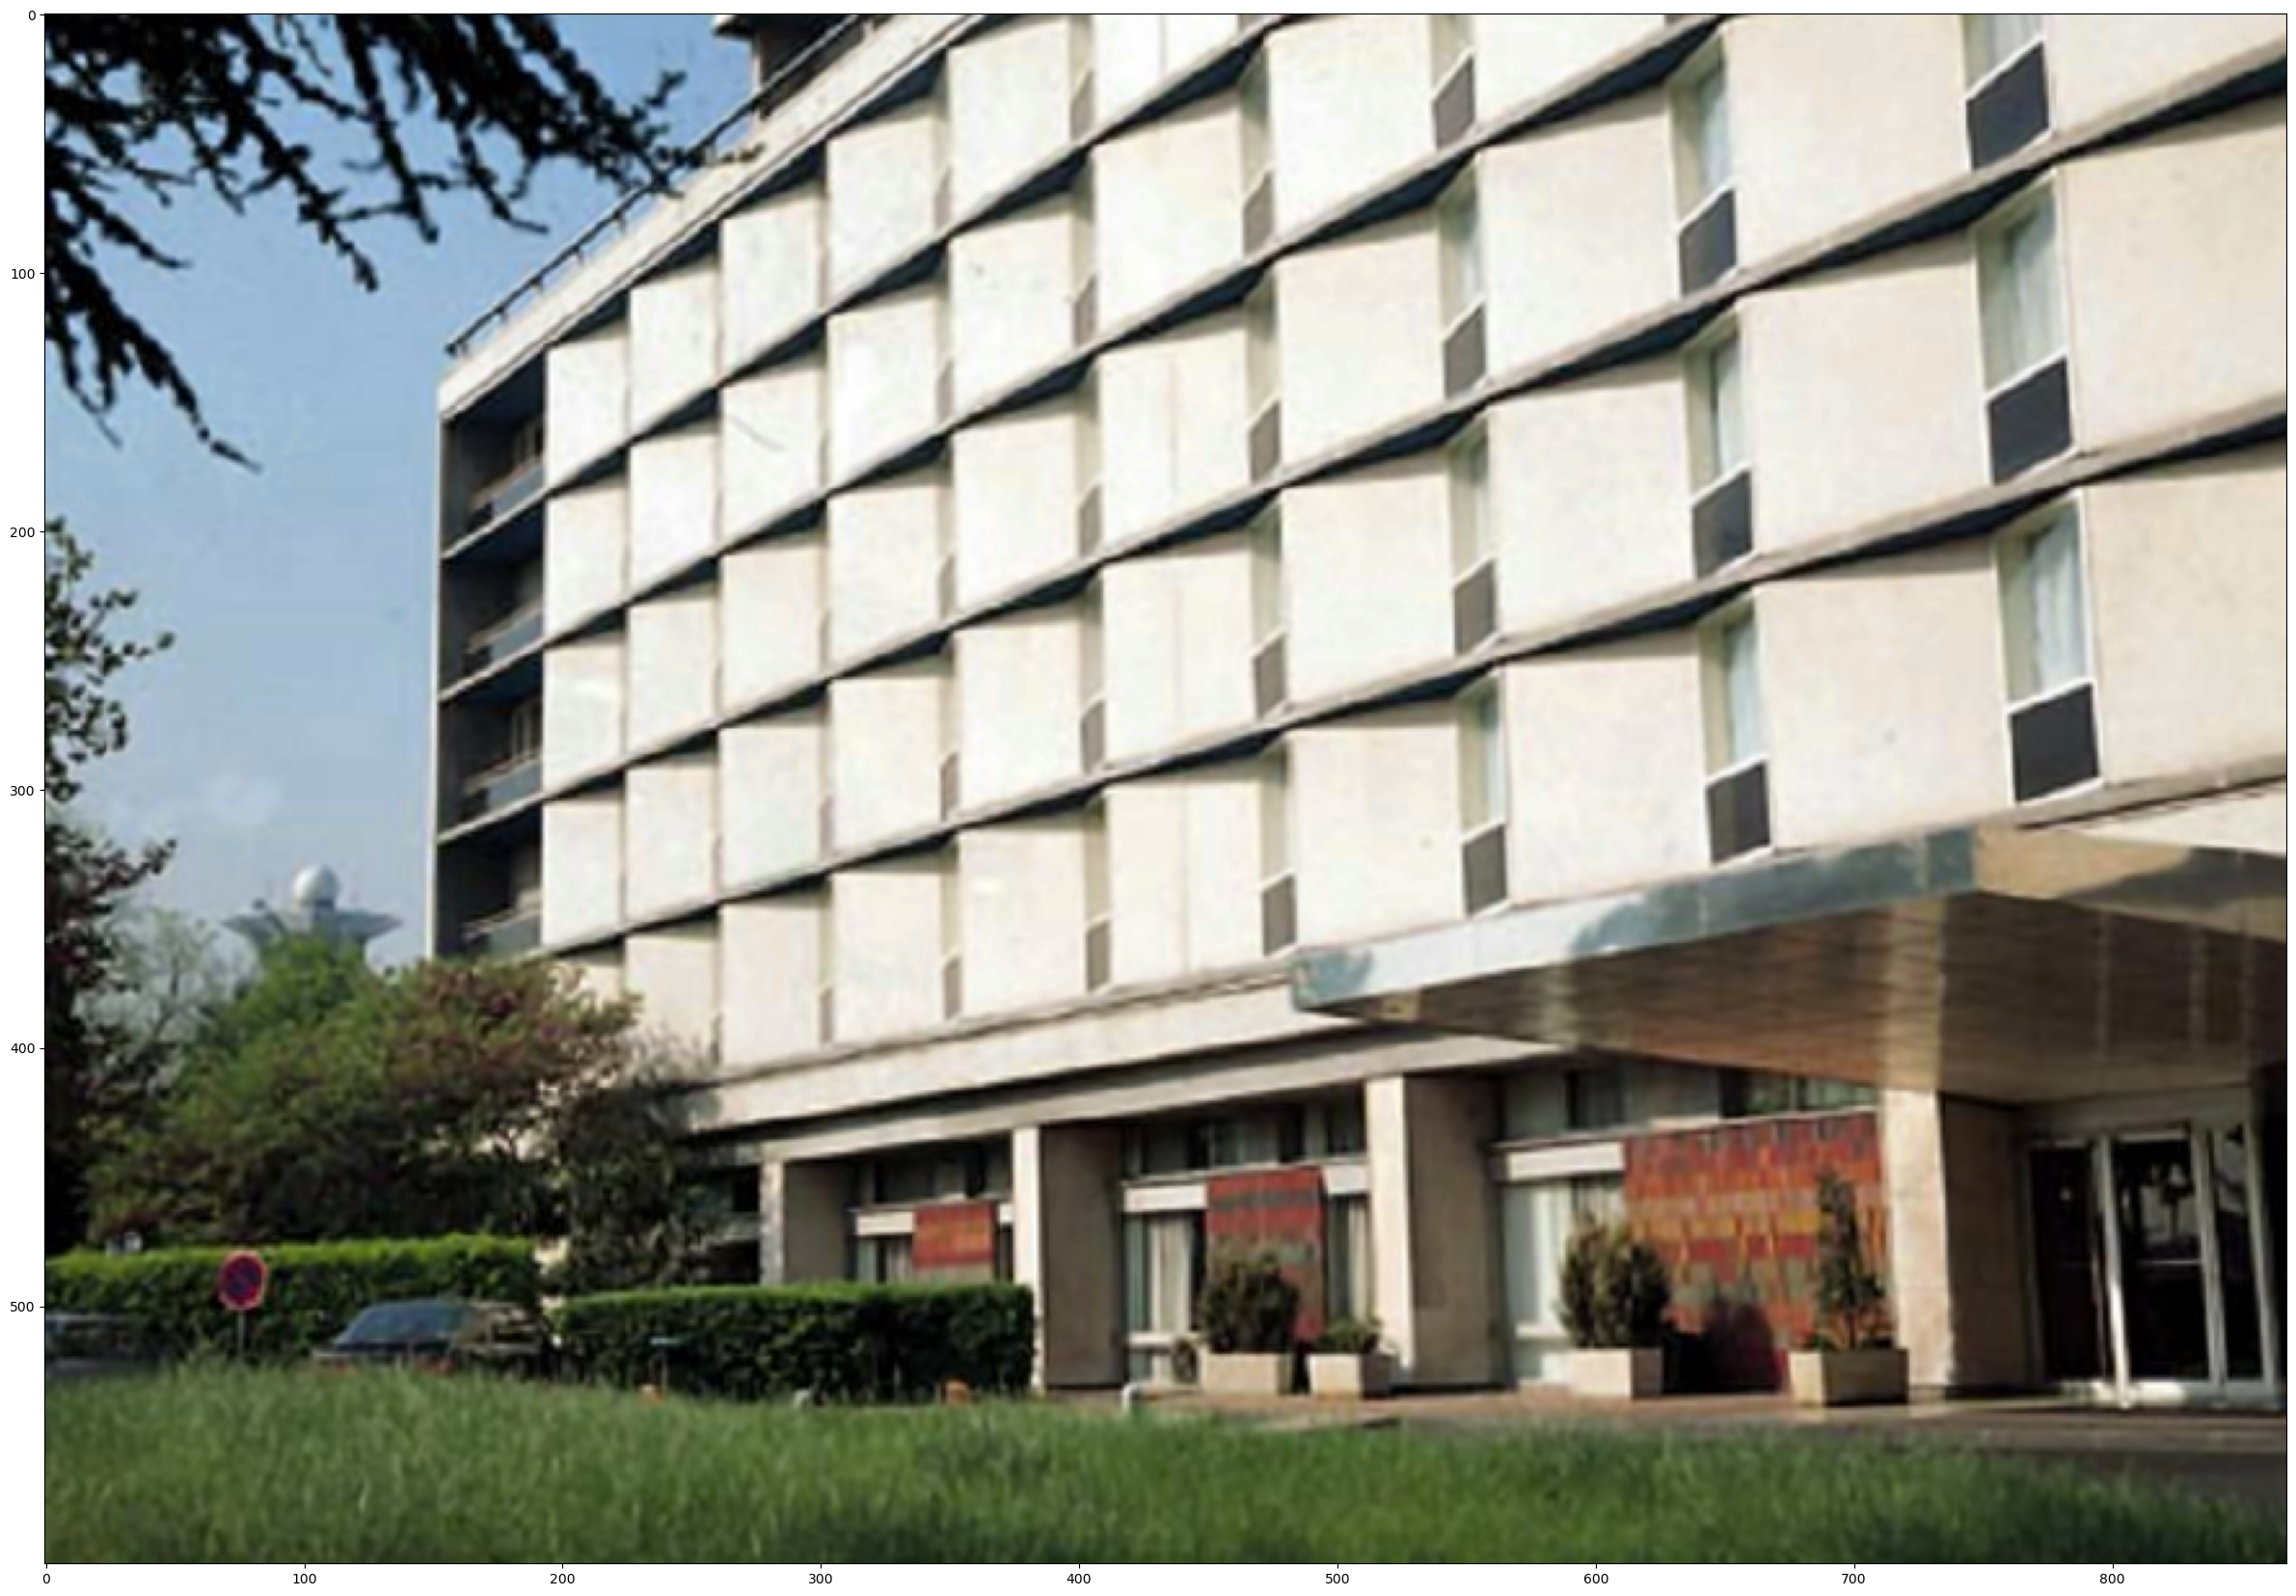

In [3]:
dest = cv.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 2)
showImage(dest, figsize=(30, 30))

In [9]:
cap = cv.VideoCapture('./input/opencv_data/vtest.avi')
# 创建5个帧的列表
img = [cap.read()[1] for i in range(5)]
# 将所有转化为灰度
gray = [cv.cvtColor(i, cv.COLOR_BGR2GRAY) for i in img]
# 将所有转化为float64
gray = [np.float64(i) for i in gray]
# 创建方差为25的噪声
noise = np.random.randn(*gray[1].shape)*10
# 在图像上添加噪声
noisy = [i+noise for i in gray]
# 转化为unit8
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]
# 对第三帧进行降噪
dest = cv.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)
showImage_cv(gray[2], cvt=False, sec=-1)
showImage_cv(noisy[2], cvt=False, sec=-1)
showImage_cv(dest, cvt=False, sec=-1)
cv.destroyAllWindows()